In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import seaborn as sb

In [3]:
df = pd.read_csv('1632300362534233.csv')
df = df.dropna()

In [4]:
le = LabelEncoder()
le.fit(df['Parking'])
df['Parking'] = le.transform(df['Parking'])

In [5]:
le.fit(df['Warehouse'])
df['Warehouse'] = le.transform(df['Warehouse'])

In [6]:
le.fit(df['Address'])
df['Address'] = le.transform(df['Address'])

In [7]:
le.fit(df['Elevator'])
df['Elevator'] = le.transform(df['Elevator'])

In [ ]:
# converting area values from str to numeric
df["Area"] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')
mylist = []
for i in df['Area']:
    if i > 1000 :
        print(i)
        mylist.append(i)

bad_rows = []
for index,row in df.iterrows():
    if row['Area'] in mylist :
        bad_rows.append(index)
df.drop(bad_rows, inplace = True)  

/tmp/ipykernel_45576/1567991910.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cdf.hist( bins=50,  ax=ax)


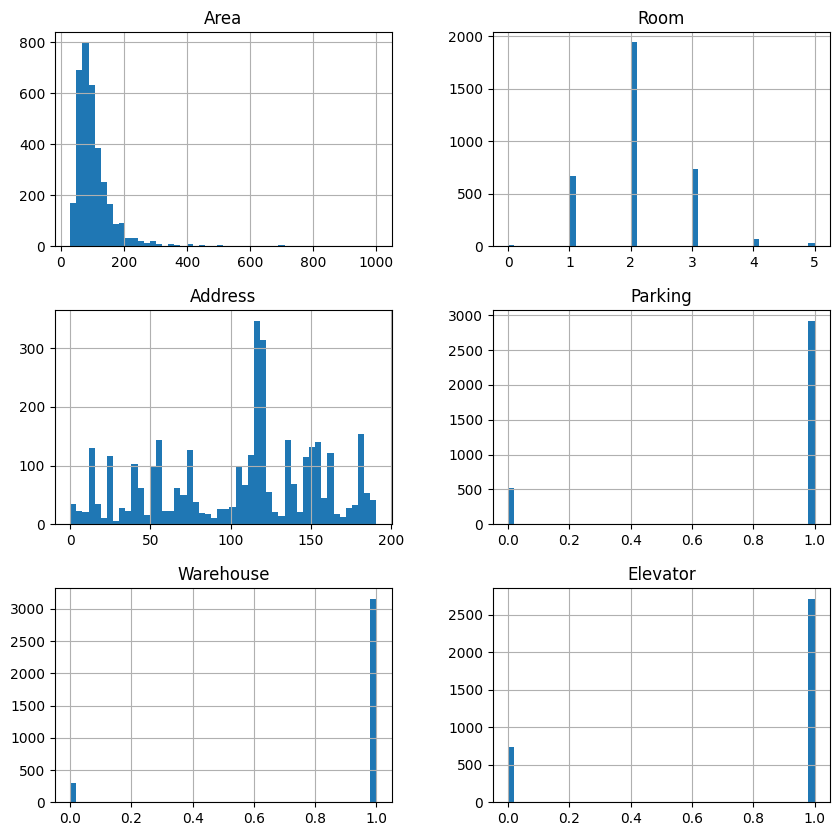

In [10]:
cdf = df[['Area', 'Room', 'Address', 'Parking', 'Warehouse', 'Elevator']]
fig, ax = plt.subplots(figsize=(10,10)) 
cdf.hist( bins=50,  ax=ax)
plt.show()

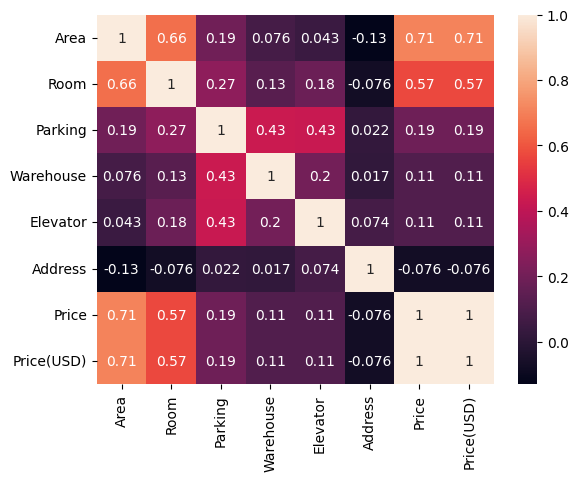

In [12]:
corr = df.corr()
sb.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.savefig('weight_chart_dpi.png', bbox_inches='tight', dpi=300)

In [13]:
cdf = df[['Area', 'Room' ,'Price(USD)']]
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Area', 'Room']])
train_y = np.asanyarray(train[['Price(USD)']])

test_x = np.asanyarray(test[['Area', 'Room']])
test_y = np.asanyarray(test[['Price(USD)']])

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
x_df = np.asanyarray(df[['Area', 'Room']])
y_df = np.asanyarray(df['Price(USD)'])
train_x , test_x , train_y , test_y = train_test_split(x_df , y_df, random_state=5)

poly = PolynomialFeatures(degree=4)
# train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression()
clf = make_pipeline(poly, clf)
clf.fit(train_x, train_y)
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
Coefficients = clf.coef_
Intercept = clf.intercept_
print('Coefficients : ', Coefficients)
print('Intercept : ', Intercept)

train_x_poly = poly.fit_transform(train_x)
train_y_ = clf.predict(train_x_poly)
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

# check if the data is not overfitted
print('for train data')
print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y_ - train_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y_ - train_y) ** 2))
print("R2-score: %.2f" % r2_score(train_y,train_y_ ))

print('for test data')
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ))

ImportError: cannot import name '_get_container_adapter' from 'sklearn.utils._set_output' (/home/fatemeh/tutorials/regression/practices/Regression/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py)

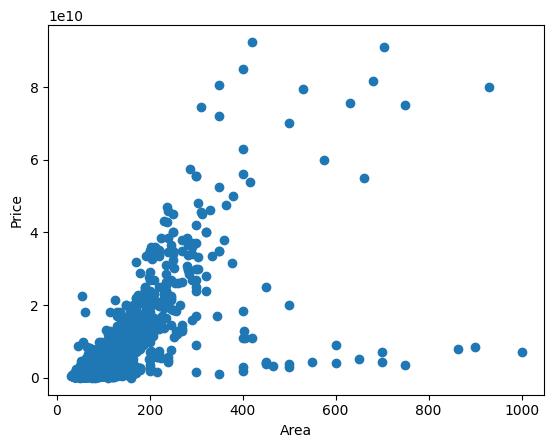

In [15]:
x = df['Area']
y = df["Price"]
plt.scatter(x, y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.show()

In [31]:
# clf.steps[0][1].get_feature_names(['Area', 'Room'])
poly.get_feature_names_out([['Area', 'Room']])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/fatemeh/tutorials/regression/practices/Regression/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_45576/3978556056.py", line 2, in <module>
    poly.get_feature_names_out([['Area', 'Room']])
  File "/home/fatemeh/tutorials/regression/practices/Regression/venv/lib/python3.10/site-packages/sklearn/preprocessing/_polynomial.py", line 285, in get_feature_names_out
    powers = self.powers_
  File "/home/fatemeh/tutorials/regression/practices/Regression/venv/lib/python3.10/site-packages/sklearn/preprocessing/_polynomial.py", line 252, in powers_
    check_is_fitted(self)
  File "/home/fatemeh/tutorials/regression/practices/Regression/venv/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1461, in check_is_fitted
sklearn.exceptions.NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' w

In [ ]:
# I drew a #D plot as I have 2 features and one output
import plotly.express as px 
x='Area'
y='Room'
z ='Price(USD)'
fig = px.scatter_3d(df, x, y, z, width=900,height=900)
fig.show()